In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [64]:
from google.colab import files
uploaded= files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [65]:
data= pd.read_csv("50_Startups.csv")

In [66]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [68]:
data[data.duplicated()]            ##### no duplicates

,R&D Spend,Administration,Marketing Spend,State,Profit


In [69]:
data1= data.rename({'R&D Spend':"RDS",'Administration':'AD','Marketing Spend':"MS",'State':"ST",'Profit':"P"},axis=1)
data1.head()

,RDS,AD,MS,ST,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
data1.corr()

<ipython-input-70-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,AD,MS,P
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
P,0.972900,0.200717,0.747766,1.000000


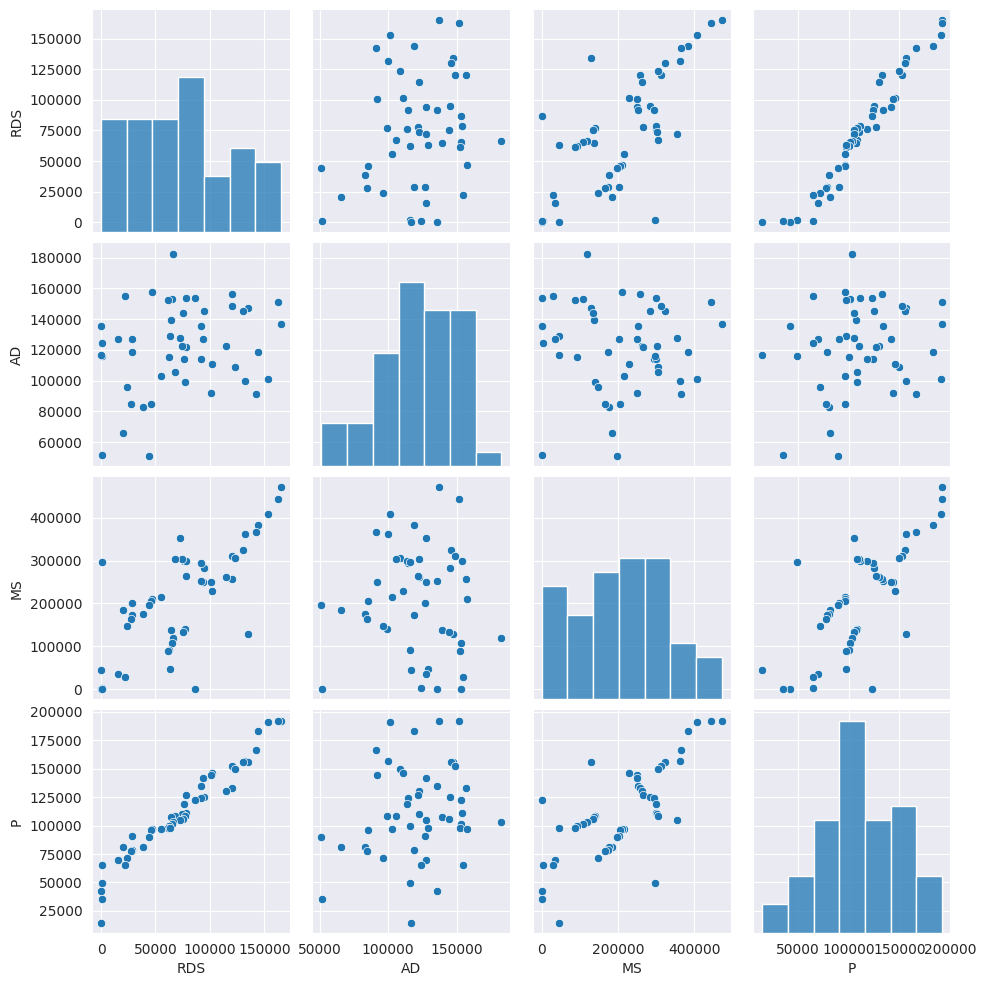

In [71]:
sns.set_style(style="darkgrid")
sns.pairplot(data1)

**Bluiding Model**

In [72]:
model= smf.ols('P~RDS+AD+MS',data=data1).fit()

In [73]:
model.params

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [74]:
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 AD           -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 AD           0.60176
 MS           0.10472
 dtype: float64)

In [75]:
model.rsquared,model.rsquared_adj      ######accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

**Simple Linear Regression Models**
for AD and MS as they have insignificant pvalues

In [76]:
smodel= smf.ols('P~AD',data=data1).fit()
smodel.tvalues, smodel.pvalues                  ###insignificant pvalue

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [77]:
smodel1=smf.ols("P~MS",data=data1).fit()
smodel1.tvalues, smodel1.pvalues          ###significant pvalue

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [78]:
smodel2=smf.ols("P~MS+AD",data=data1).fit()
smodel2.tvalues, smodel2.pvalues        ####significant pvalue

(Intercept    1.142741
 MS           8.281039
 AD           2.467779
 dtype: float64,
 Intercept    2.589341e-01
 MS           9.727245e-11
 AD           1.729198e-02
 dtype: float64)

**Model Validation**
Calculating **VIF**

In [79]:
r_ms= smf.ols("MS~AD+RDS",data=data1).fit().rsquared
vif_ms= 1/(1-r_ms)

In [80]:
r_ad= smf.ols("AD~MS+RDS",data=data1).fit().rsquared
vif_ad= 1/(1-r_ad)

In [81]:
r_rds= smf.ols("RDS~AD+MS",data=data1).fit().rsquared
vif_rds= 1/(1-r_rds)

In [82]:
d1= {"Variables":["RDS","AD","MS"], "VIF":[vif_rds,vif_ad,vif_ms]}
VIF= pd.DataFrame(d1)
VIF

,Variables,VIF
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


**Residual Analysis**

Test For Normality of residuals

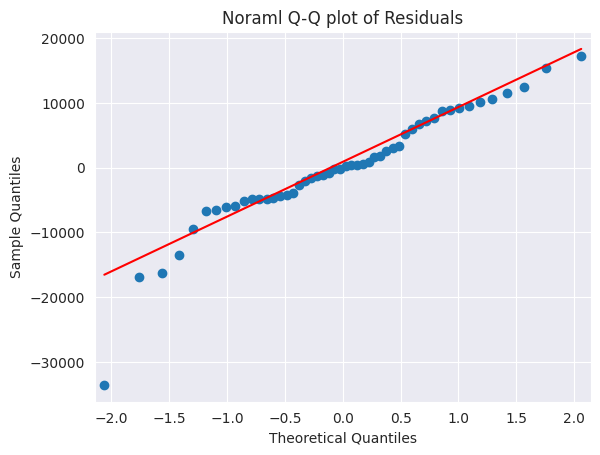

In [83]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Noraml Q-Q plot of Residuals")
plt.show()

In [84]:
list=np.where(model.resid<-30000)
list

(array([49]),)

In [85]:
def standard_values(vals) :
   return (vals-vals.mean())/vals.std()        ####for scaling the data

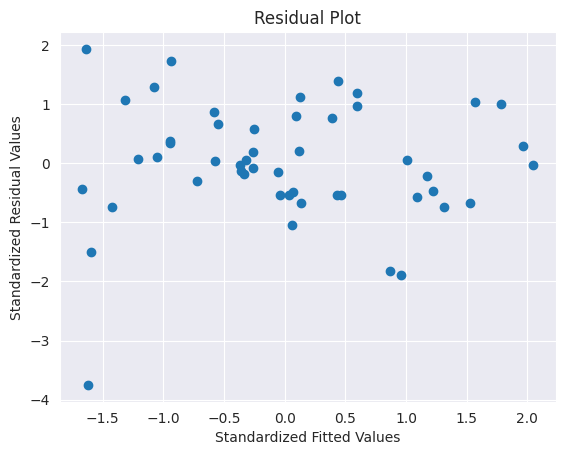

In [86]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

**Residual Vs Regressors**

Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors


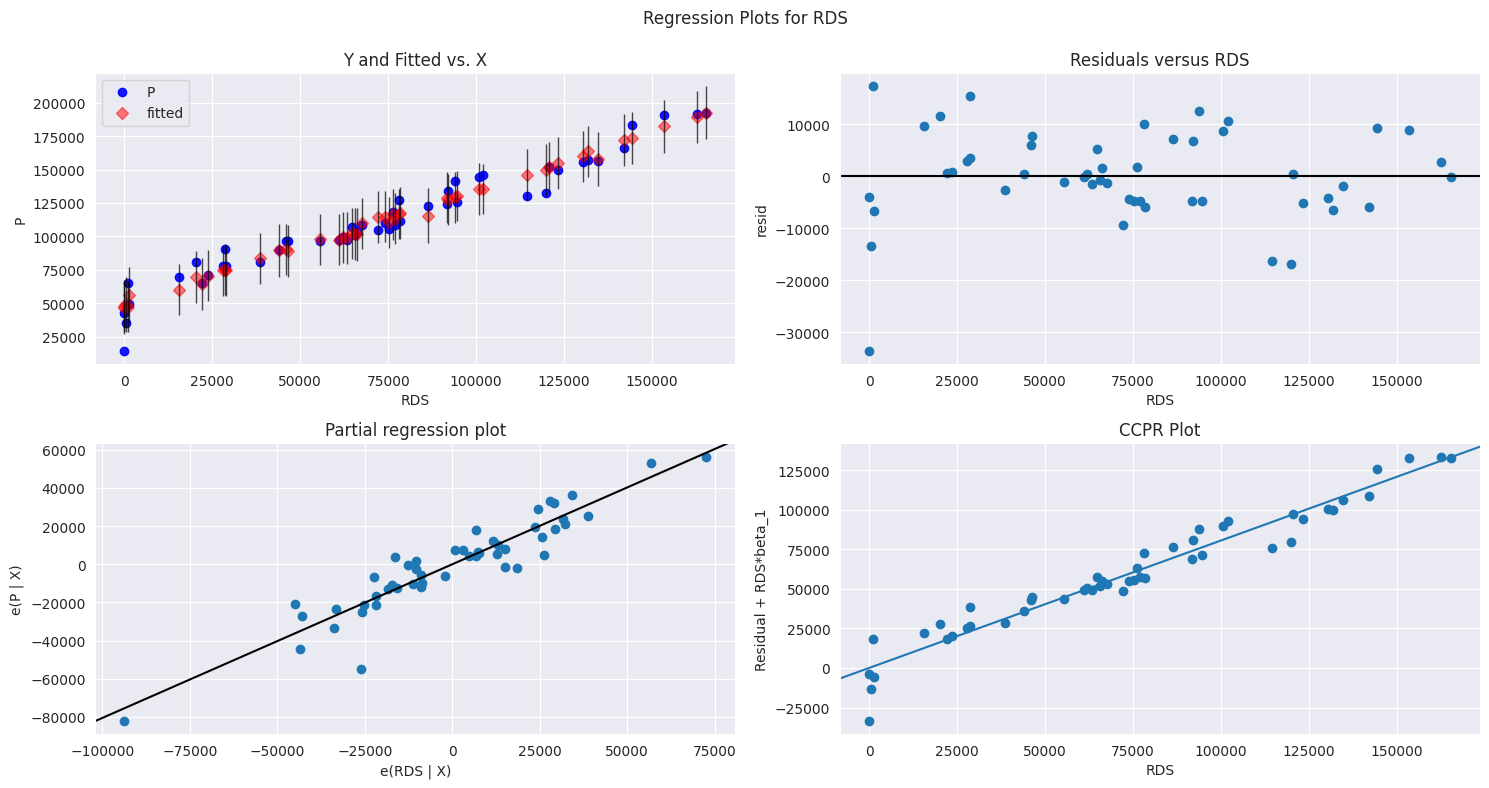

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

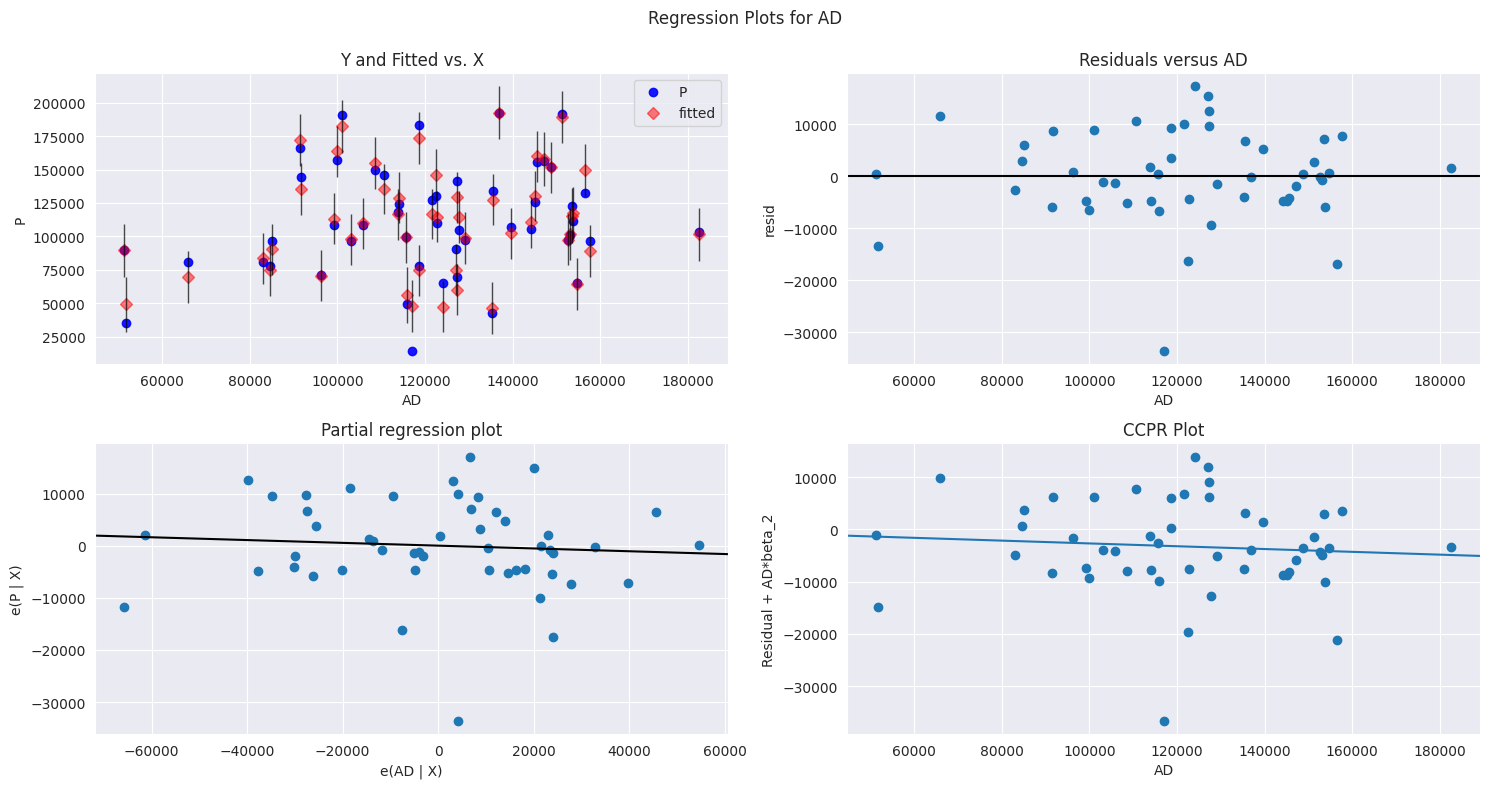

In [88]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"AD",fig=fig)
plt.show()

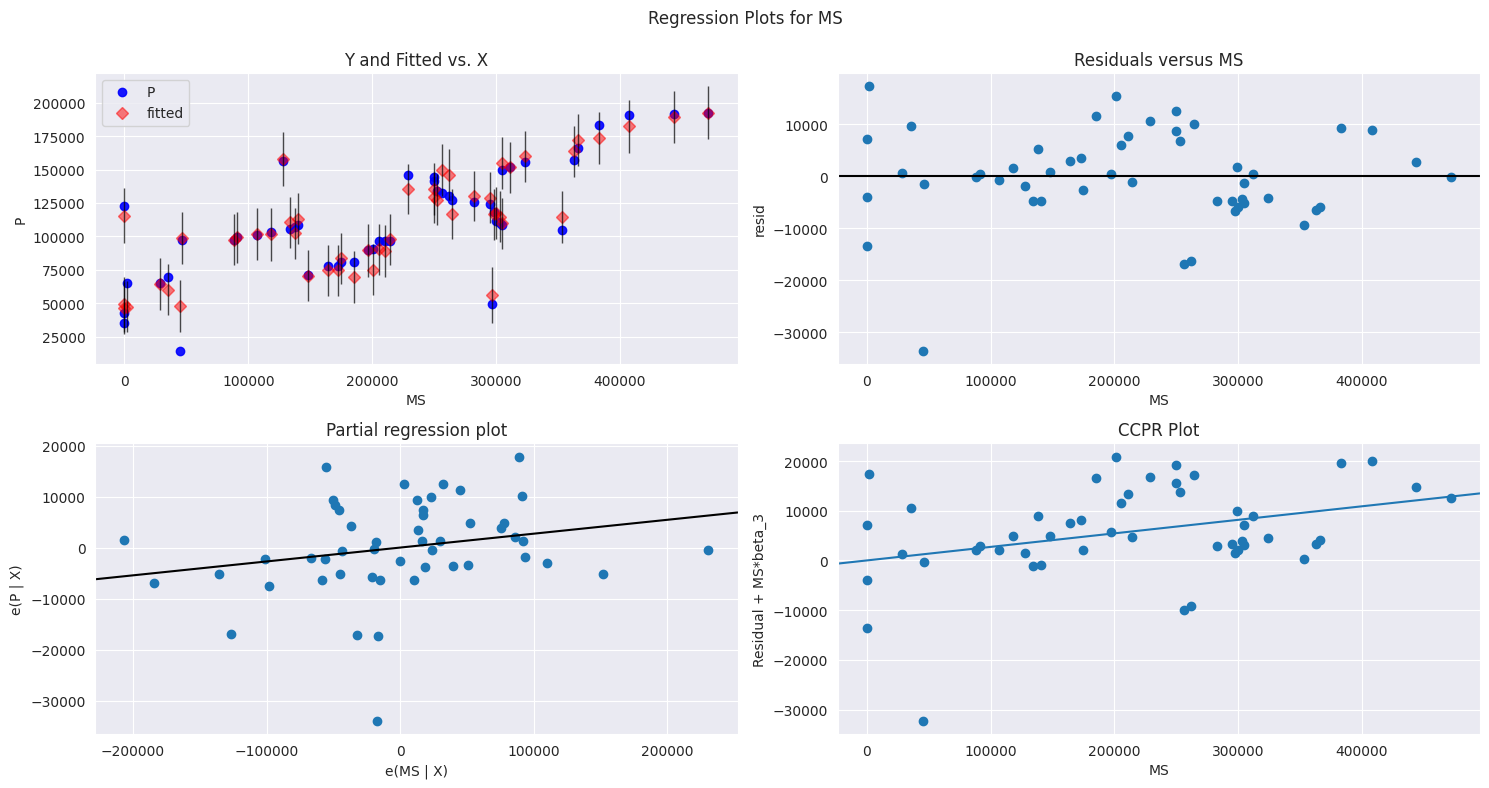

In [89]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

**Model Deletion Diagnostics**

Checking Outliers/Influencers

**A)Cook's Distance**

In [90]:
model_influence= model.get_influence()
(c,_)= model_influence.cooks_distance

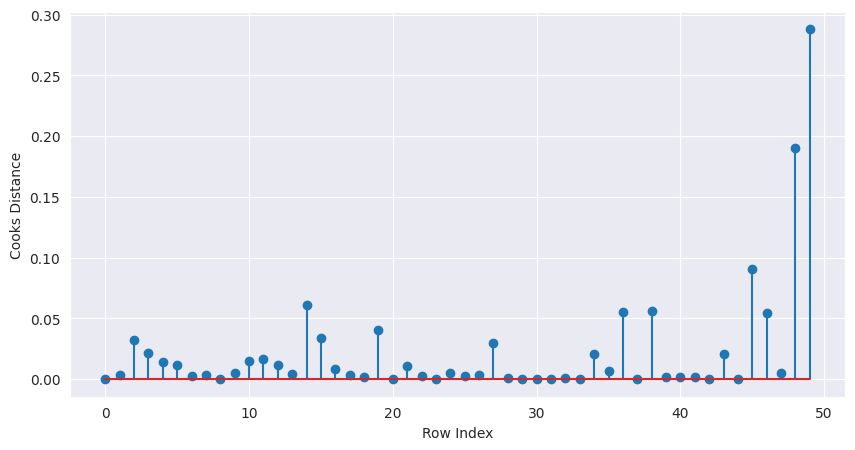

In [91]:
fig= plt.figure(figsize=(10,5))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [92]:
np.argmax(c), np.max(c)            ##########index and value of influencer where c is more than 0.5

(49, 0.2880822927543272)

**B) Leverage Value**

High Influence Points

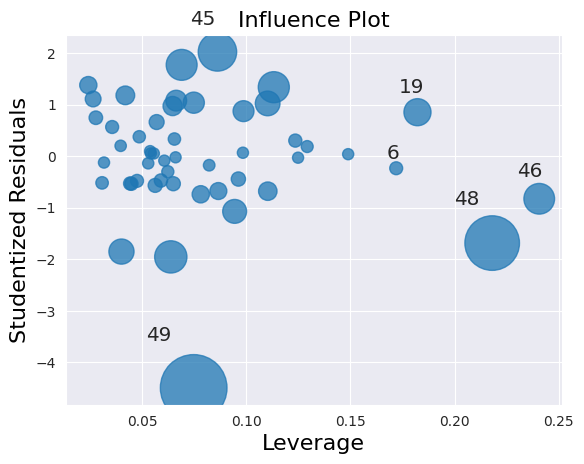

In [93]:
influence_plot(model)
plt.show()

In [94]:
k= data1.shape[1]       ##### no. of columns/features
n=  data1.shape[0]      ##### no. of datapoints
leverage_cutoff= (3*(k+1))/n
leverage_cutoff

0.36

In [95]:
data1[data1.index.isin([49])]               #### 49th datapoint is the influencer

,RDS,AD,MS,ST,P
49,0.0,116983.8,45173.06,California,14681.4


**Improving The Model**

In [96]:
profit_new= data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)  ###droping influncer and reassign row number.
profit_new.tail()

,RDS,AD,MS,ST,P
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


**Bluiding Model And Deletion Diagnotiscs**

In [97]:
model2= smf.ols("P~RDS+AD+MS",data=profit_new).fit()

Cooks Distance

In [98]:
(c,_)= model2.get_influence().cooks_distance

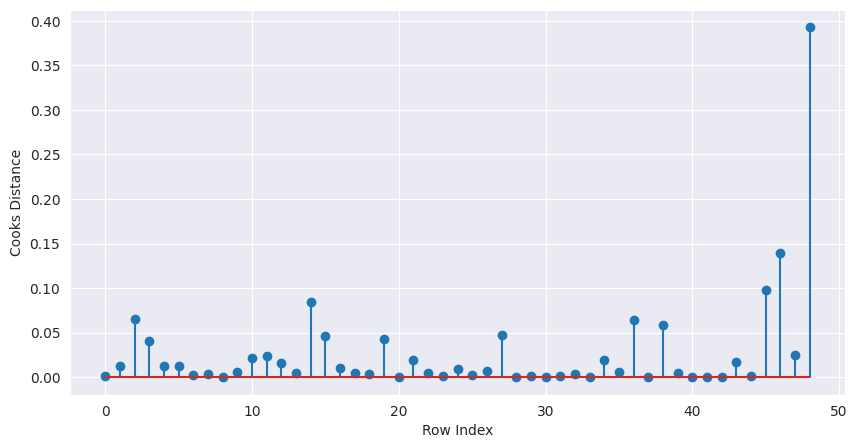

In [99]:
fig= plt.figure(figsize=(10,5))
plt.stem(np.arange(len(profit_new)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [100]:
np.argmax(c), np.max(c)

(48, 0.39274420556321443)

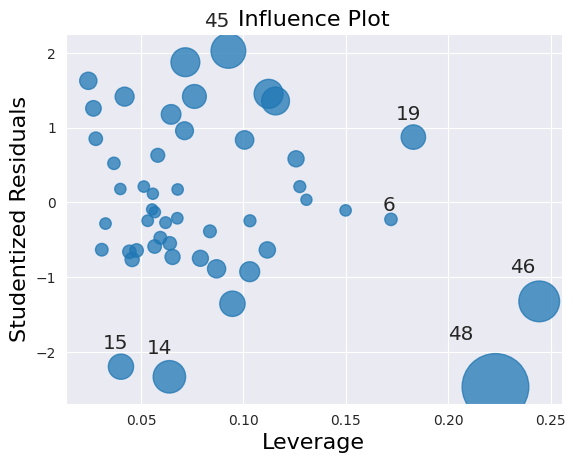

In [101]:
influence_plot(model2)
plt.show()

In [102]:
k= profit_new.shape[1]
n=  profit_new.shape[0]
leverage_cutoff= (3*(k+1))/n
leverage_cutoff

0.3673469387755102

As c<1 and their is no point beyond leverage_cutoff.

**We can finalise the model**

In [103]:
final_model= smf.ols("P~RDS+AD+MS",data=profit_new).fit()
final_model.rsquared, final_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

**The Model accuracy is improved to 96.13%**

**Model Predictions**

In [104]:
profit_new

,RDS,AD,MS,ST,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [105]:
new_data= pd.DataFrame({'RDS':150000,'AD':100000,"MS":130000},index=[0])
new_data

,RDS,AD,MS
0,150000,100000,130000


In [106]:
final_model.predict(new_data)

0    170892.954524
dtype: float64

In [107]:
final_model.predict(profit_new)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

**Table containing R^2 value for each prepared model.**

In [108]:
A= {'Prep_model':['Model','Final_Model'],"Rsquared":[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(A)
table

,Prep_model,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
